## Figure preparation for VOR/OKR data

### Loading packages

In [152]:
library(tidyverse) #for data manipulation and visualization
library(ggpubr) #for creating easily publication ready plots
library(reshape)
library(ggplot2)

### Import VOG data from VOG data Retriever

In [78]:
VOG.data <- read.delim("clipboard", sep = '\t', stringsAsFactors = F, header = T)

### Remove the separators in dataframe

In [142]:
VOG.data2 <- VOG.data[-c(5,10,15,20,25,30),]
dim(VOG.data2)

[1] 24  8

### Add type (Gain or Phase), protocol (OKR or dVOR or lVOR), stimulu condition (frequency)

In [143]:
type <- rep(c("Gain", "Phase"), each=(dim(VOG.data2)[1])/2)
protocol <- rep(rep(c("OKR", "dVOR", "lVOR"), each=4),2)
condition <- rep(c("0 min", "15 min", "30 min","45 min"), 6) #rep(c("0.1Hz", "0.25Hz", "0.5Hz","1.0Hz"), 6)

VOG.data2 <- cbind(type, protocol, condition, VOG.data2)
head(VOG.data2)

,type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL,Mean,S.D,S.E.M
,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452,0.342,0.093,0.041
2,Gain,OKR,15 min,0.326,0.397,0.450,0.445,0.631,0.450,0.113,0.050
3,Gain,OKR,30 min,0.360,0.434,0.513,0.537,0.664,0.502,0.114,0.051
4,Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657,0.551,0.103,0.046
6,Gain,dVOR,0 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Gain,dVOR,15 min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop rows containing unmeasured protocol(s) 

In [144]:
VOG.data3 <- filter(VOG.data2, G01_292_OL!="NaN")
VOG.data3

type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL,Mean,S.D,S.E.M
<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452,0.342,0.093,0.041
Gain,OKR,15 min,0.326,0.397,0.450,0.445,0.631,0.450,0.113,0.050
Gain,OKR,30 min,0.360,0.434,0.513,0.537,0.664,0.502,0.114,0.051
Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657,0.551,0.103,0.046
Phase,OKR,0 min,-25.140,-12.967,-14.733,-21.213,-21.670,-19.145,5.105,2.283
Phase,OKR,15 min,-13.343,-11.827,-7.557,-7.000,-8.927,-9.731,2.751,1.230
Phase,OKR,30 min,-11.367,-6.927,-7.440,-6.987,-8.647,-8.274,1.862,0.833
Phase,OKR,45 min,-5.737,-4.200,-6.067,-7.153,-8.547,-6.341,1.624,0.726


### Drop columns containing discriptive statistics

In [145]:
VOG.data3 <- VOG.data3[,1:(dim(VOG.data3)[2]-3)]
VOG.data3

type,protocol,condition,G01_292_OL,G01_293_OL,G01_901_OL,G01_902_OL,G01_903_OL
<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
Gain,OKR,0 min,0.217,0.404,0.347,0.289,0.452
Gain,OKR,15 min,0.326,0.397,0.450,0.445,0.631
Gain,OKR,30 min,0.360,0.434,0.513,0.537,0.664
Gain,OKR,45 min,0.381,0.551,0.582,0.585,0.657
Phase,OKR,0 min,-25.140,-12.967,-14.733,-21.213,-21.670
Phase,OKR,15 min,-13.343,-11.827,-7.557,-7.000,-8.927
Phase,OKR,30 min,-11.367,-6.927,-7.440,-6.987,-8.647
Phase,OKR,45 min,-5.737,-4.200,-6.067,-7.153,-8.547


### Covert from wide-format to long-format 

In [150]:
long.format.VOG.data <- melt(VOG.data3, id.vars = c("type","protocol","condition"))
long.format.VOG.data <- long.format.VOG.data %>% select(variable, type, protocol, condition, value) 
colnames(long.format.VOG.data)  <- c("id", "type", "protocol","condition", "value")
long.format.VOG.data$value <- as.numeric(as.character(long.format.VOG.data$value))
head(long.format.VOG.data)

,id,type,protocol,condition,value
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,G01_292_OL,Gain,OKR,0 min,0.217
2,G01_292_OL,Gain,OKR,15 min,0.326
3,G01_292_OL,Gain,OKR,30 min,0.360
4,G01_292_OL,Gain,OKR,45 min,0.381
5,G01_292_OL,Phase,OKR,0 min,-25.140
6,G01_292_OL,Phase,OKR,15 min,-13.343


### Prepare Gain and Phase tables

In [163]:
Gain.table <- long.format.VOG.data %>% filter(type=="Gain")
Phase.table <- long.format.VOG.data  %>% filter(type=="Phase")

### Result Figures

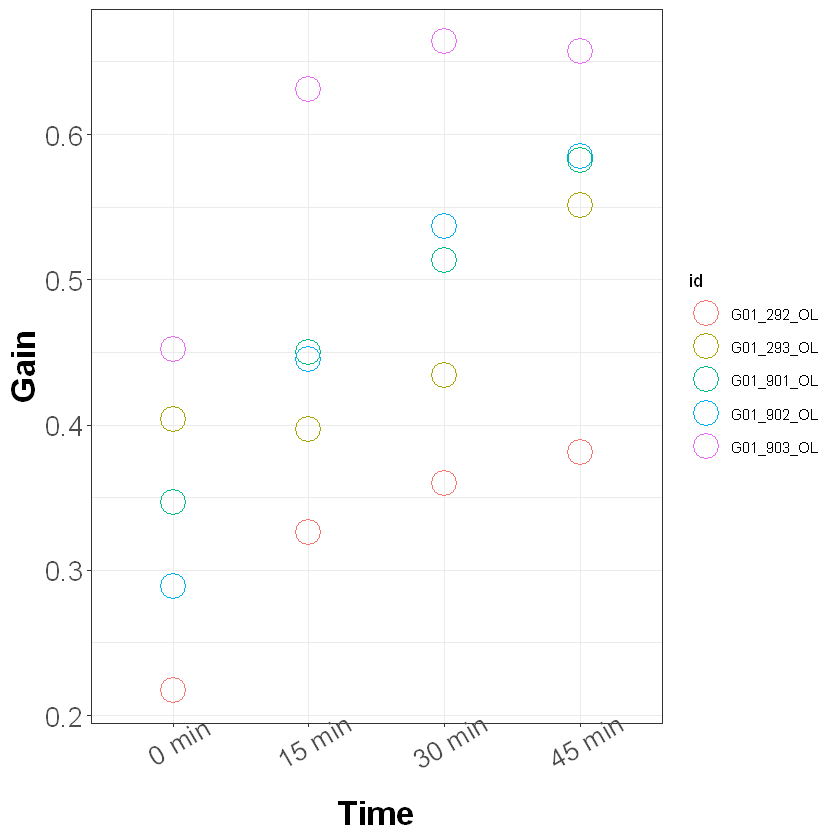

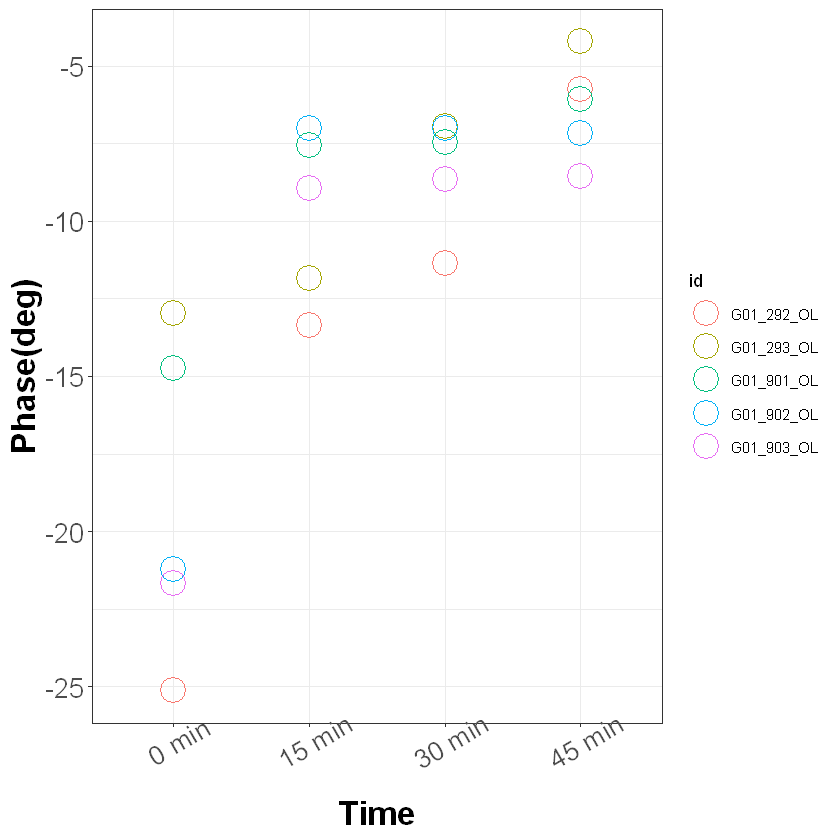

In [186]:
g <- ggplot(Gain.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Gain") + xlab("Time")
g <- g + geom_point(shape=1, size=7)
g + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16)) 
p <- ggplot(Phase.table, aes(x=condition, y=value, color=id)) + theme_bw() + ylab("Phase(deg)") + xlab("Time")
p <- p + geom_point(shape=1, size=7)
p + theme(axis.title.x=element_text(face="bold",size=20),
          axis.text.x=element_text(angle=30,size=16),
          axis.title.y=element_text(face="bold",size=20),
          axis.text.y=element_text(size=16)) 